## Exploratory Data Analysis

### Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


In [3]:
# Delete the last two columns
df = df.iloc[:, :-2]
# We find that there exist 'Unknown' in some features, we need to transfer the 'Unknown' to 'Nan'
df = df.replace({'Unknown': np.nan})
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [4]:
df.dropna(inplace=True)
len(df)

7081

In [5]:
unique_attrition_flags = df['Attrition_Flag'].unique()
print(unique_attrition_flags)
unique_Gender = df['Gender'].unique()
print(unique_Gender)
unique_Education_Level = df['Education_Level'].unique()
print(unique_Education_Level)
unique_Marital_Status = df['Marital_Status'].unique()
print(unique_Marital_Status)
unique_Income_Category = df['Income_Category'].unique()
print(unique_Income_Category)
unique_Card_Category = df['Card_Category'].unique()
print(unique_Card_Category)

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
['Blue' 'Gold' 'Silver' 'Platinum']


### Data Visualization

In [6]:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots

#### 1. Distribution of Customer Basic Characteristics

In [24]:
# 1.1 Distribution of Customer Ages by gender
fig = go.Figure()

fig.add_trace(go.Box(x=df['Gender'], y=df['Customer_Age'], boxmean=True, name='Customer Age'))

fig.update_layout(height=500, width=600, title_text="Distribution of Customer Ages by gender")

fig.show()


In [22]:
# 1.1 Distribution of Customer Ages by gender
fig = px.histogram(df, x='Customer_Age', color='Gender', barmode='stack', 
                   labels={'Customer_Age': 'Age', 'Gender': 'Gender'},
                   title="Distribution of Customer Ages by Gender")

fig.update_layout(height=400, width=800)

fig.show()

In [12]:
# 1.2 Marital Status
fig = px.pie(df, names='Marital_Status', hole=0.3, title='Distribution of Marital Status')
fig.update_layout(height=400, width=600)

fig.show()

In [9]:
# 1.3 Education Level
fig = px.pie(df, names='Education_Level', hole=0.3, title='Distribution of Education Level')
fig.update_layout(height=400, width=600)

fig.show()

In [10]:
# 1.4 Income Level
fig = px.pie(df, names='Income_Category', hole=0.3, title='Distribution of Income Category')
fig.update_layout(height=400, width=600)

fig.show()

In [70]:
# 1.5 Distribution of Dependent counts (close family size)
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=["Dependent count Box Plot", "Dependent count Histogram"],
    shared_xaxes=False
)

box_trace = go.Box(x=df['Dependent_count'], name='Dependent count Box Plot', boxmean=True, marker=dict(color='rgba(50, 50, 255, 0.7)'))
fig.add_trace(box_trace, row=1, col=1)

hist_trace = go.Histogram(x=df['Dependent_count'], name='Dependent count Histogram', marker=dict(color='rgba(30, 60, 200, 0.7)'))
fig.add_trace(hist_trace, row=2, col=1)

fig.update_layout(
    height=700, width=1200,
    title_text="Distribution of Dependent counts (close family size)",
    showlegend=False, 
    template='plotly_white',
)

fig.update_xaxes(title_text="Dependent count", row=2, col=1, showgrid=True)
fig.update_yaxes(title_text="Count", row=2, col=1, showgrid=True)

fig.show()


#### 2. Relationship between Education Level and Income Category

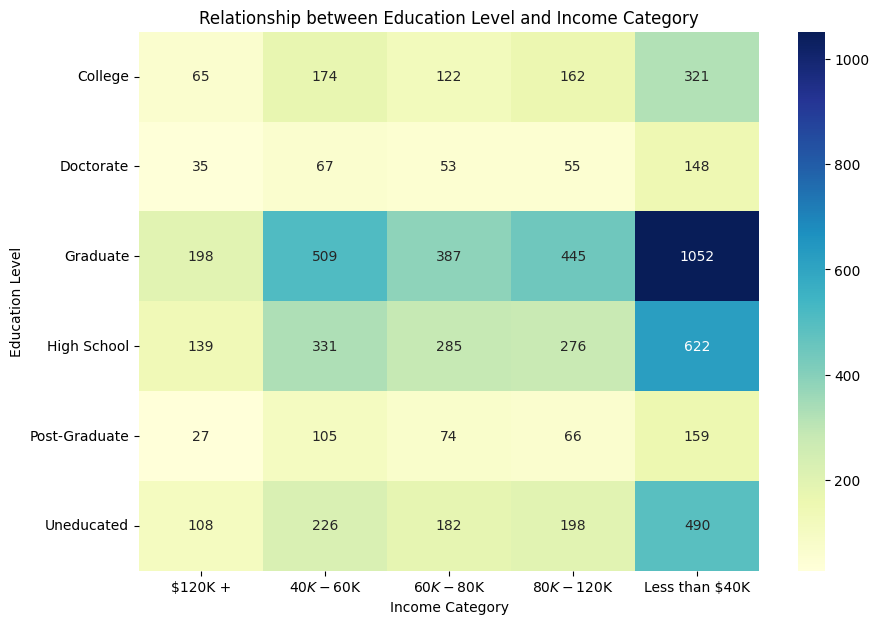

In [50]:
cross_tab = pd.crosstab(df['Education_Level'], df['Income_Category'])

plt.figure(figsize=(10, 7))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='g', cbar=True)

plt.title('Relationship between Education Level and Income Category')
plt.xlabel('Income Category')
plt.ylabel('Education Level')

plt.show()


#### 3. Distribution of Banking Business Details

In [48]:
# 3.1 Types of credit cards held
fig = px.pie(df, names='Card_Category', hole=0.3, title='Distribution of Card Categories')
fig.update_layout(height=400, width=600)

fig.show()

In [49]:
# 3.2 Gender of holders of the four types of credit cards
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=['Blue', 'Gold', 'Silver', 'Platinum'],
    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]],
    horizontal_spacing=0.05
)

card_categories = df['Card_Category'].unique()

for i, card_category in enumerate(card_categories):
 
    subset_data = df[df['Card_Category'] == card_category]
    
    fig.add_trace(
        go.Pie(
            labels=subset_data['Gender'].value_counts().index,
            values=subset_data['Gender'].value_counts().values,
            pull=[0,0.2,0.5],
            hole=0.3,
            name=card_category
        ),
        row=1, col=i+1
    )

fig.update_layout(
    height=400, width=1200,
    title_text="<b>Distribution of Gender by Card Category<b>",
)

fig.show()

In [53]:
#3.3 Distribution of Months_on_book with Card_Category
fig = px.histogram(df, x='Months_on_book', color='Card_Category',
                   title='Distribution of Months_on_book with Card_Category',
                   labels={'Months_on_book': 'Months on Book', 'Card_Category': 'Card Category'},
                   opacity=0.7, barmode='stack')

fig.update_layout(height=700, width=900)
fig.show()

print('Kurtosis of Months on book features is {:.2f}'.format(df['Months_on_book'].kurt()))


Kurtosis of Months on book features is 0.31


The distribution of the "Months on book" feature of the dataset has relatively light tails, but the overall shape is close to a normal distribution.

In [54]:
# 3.4 Total Relationship Count
fig = px.histogram(df, x='Total_Relationship_Count', title='Distribution of Total Relationship Count',
                   labels={'Total_Relationship_Count': 'Total Relationship Count'},
                   barmode='overlay', nbins=20)

fig.update_layout(height=400, width=800)

fig.show()


In [55]:
#3.5 Number of months inactive
fig = px.histogram(df, x='Months_Inactive_12_mon', title='Number of months inactive Box Plot',
                   labels={'Months_Inactive_12_mon': 'number of months inactive Histogram'},
                   barmode='overlay', nbins=20)

fig.update_layout(height=400, width=800)

fig.show()

In [56]:
# 3.6 Total Transaction Amount (Last 12 months)
fig = px.histogram(df, x='Total_Trans_Amt', title='Distribution of Total Transaction Amount (Last 12 months)',
                   labels={'Total_Trans_Amt': 'Total Transaction Amount'},
                   barmode='overlay', nbins=20)

fig.update_layout(height=400, width=800)

fig.show()


In [57]:
#3.7 Credit Limit
fig = px.histogram(df, x='Credit_Limit', title='Distribution of Credit_Limit',
                   labels={'Credit_Limit': 'Credit Limit'},
                   barmode='overlay', nbins=20)

fig.update_layout(height=500, width=800)

fig.show()

#### 4. Bank Churn Attrition

In [58]:
fig = px.pie(df, names='Attrition_Flag', hole=0.3, title='Distribution of Attrition_Flag')
fig.update_layout(height=400, width=500)

fig.show()


As we can see, only 15.7% of the data samples represent churn customers; in the following steps, we will use SMOTE to upsample the churn samples to match them with the regular customer sample size to give the later selected models a better chance ofcatching on small details which will almost definitely be missed out with such a size difference.

In [52]:
fig = px.scatter(df, y='Months_on_book', x='Credit_Limit', color='Attrition_Flag', 
                 title='Scatter Plot of Attrition_Flag based on Months_on_book and Credit_Limit',
                 labels={'Months_on_book': 'Months on Book', 'Credit_Limit': 'Credit Limit', 'Attrition_Flag': 'Attrition Flag'})

fig.show()

In [59]:
cross_table = pd.crosstab(df['Income_Category'], df['Attrition_Flag'])
fig = px.imshow(cross_table, labels=dict(x="Attrition Flag", y="Income Category", color="Count"),
                x=cross_table.columns,
                y=cross_table.index,
                color_continuous_scale="Viridis",  
                title='Relationship between Income_Category and Attrition_Flag',
                width=600, height=600)

fig.show()

In [60]:
cross_table = pd.crosstab(df['Education_Level'], df['Attrition_Flag'])
fig = px.imshow(cross_table, labels=dict(x="Attrition Flag", y="Education Level", color="Count"),
                x=cross_table.columns,
                y=cross_table.index,
                color_continuous_scale="Viridis",  
                title='Relationship between Education_Level and Attrition_Flag',
                width=600, height=600)

fig.show()

In [72]:
cross_table = pd.crosstab(df['Card_Category'], df['Attrition_Flag'])
fig = px.imshow(cross_table, labels=dict(x="Attrition Flag", y="Card Category", color="Count"),
                x=cross_table.columns,
                y=cross_table.index,
                color_continuous_scale="Viridis",  
                title='Relationship between Card_Category and Attrition_Flag',
                width=500, height=500)

fig.show()